In [12]:
# Dependencies
from census import Census
from api_keys import api_key
import hvplot.pandas
import pandas as pd
import seaborn as sns
import requests
import numpy as np
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [13]:
# Load data
census_data = pd.read_csv('Resources/UPDATED_census_data_2019_2023.csv')

In [14]:
census_data['Year'] = census_data['Year'].astype(str)

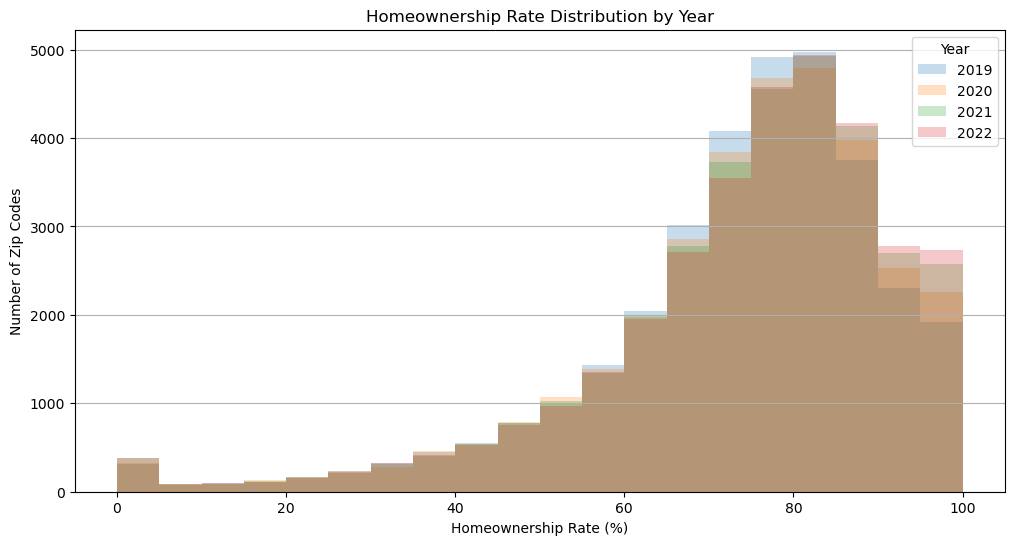

In [41]:
# Create plot
plt.figure(figsize=(12, 6))

# List of years to plot
years = ['2019', '2020', '2021', '2022']

# Loop through each year
for year in years:
    # Filter data for the current year
    year_data = census_data[census_data['Year'] == year]
    
    # Plot a histogram for homeownership rate
    plt.hist(year_data['Homeownership_Rate'], bins=20, alpha=0.25, label=year)

# Adding titles and labels
plt.title('Homeownership Rate Distribution by Year')
plt.xlabel('Homeownership Rate (%)')
plt.ylabel('Number of Zip Codes')
plt.grid(axis='y')
plt.legend(title='Year')
plt.show()

2019 Regression: Slope = -2.468464275294531e-09, Intercept = 73.27157870137287, R-squared = 0.000, P-value = 0.000
2020 Regression: Slope = -2.808148018192635e-09, Intercept = 73.66466196056356, R-squared = 0.001, P-value = 0.000
2021 Regression: Slope = -1.7709914644406296e-09, Intercept = 74.14934190989308, R-squared = 0.000, P-value = 0.004
2022 Regression: Slope = -1.219455509345864e-09, Intercept = 74.41147238406738, R-squared = 0.000, P-value = 0.046


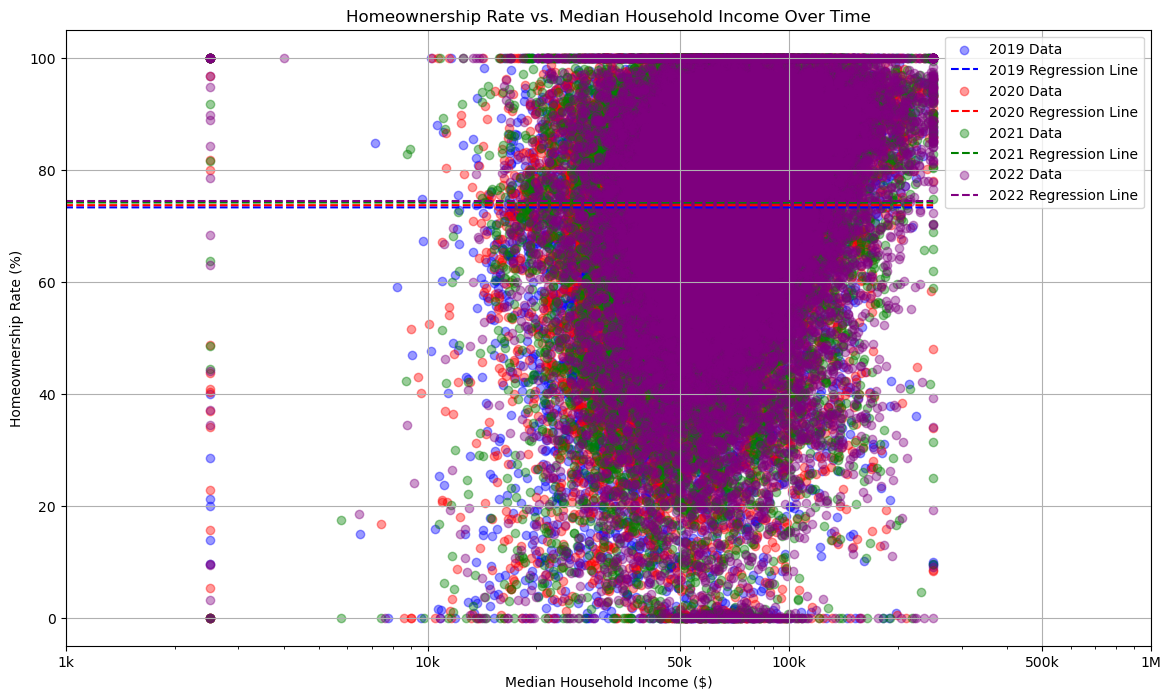

In [43]:
colors = { '2019': 'blue', '2020': 'red', '2021': 'green', '2022': 'purple'}

plt.figure(figsize=(14, 8))

# Loop through each year to perform regression and plot
for year in ['2019', '2020', '2021', '2022']:
    year_data = census_data[census_data['Year'] == year]
    
    # Drop NaN values for clean regression analysis
    year_data_clean = year_data[['Median_Household_Income', 'Homeownership_Rate']].dropna()
    
    # Perform linear regression
    if not year_data_clean.empty:
        slope, intercept, r_value, p_value, std_err = linregress(year_data_clean['Median_Household_Income'], year_data_clean['Homeownership_Rate'])
        print(f"{year} Regression: Slope = {slope}, Intercept = {intercept}, R-squared = {r_value**2:.3f}, P-value = {p_value:.3f}")
        
        # Scatter plot
        plt.scatter(year_data_clean['Median_Household_Income'], year_data_clean['Homeownership_Rate'], color=colors[year], alpha=0.4, label=f'{year} Data')
        
        # Regression line
        x = np.array([year_data_clean['Median_Household_Income'].min(), year_data_clean['Median_Household_Income'].max()])
        plt.plot(x, x * slope + intercept, color=colors[year], linestyle='--', label=f'{year} Regression Line')

# Set x-axis to logarithmic scale
plt.xscale('log')

# Replace log scale with dollar scale
ticks = [10**3, 10**4, 5*10**4, 10**5, 5*10**5, 10**6]
tick_labels = ['1k', '10k', '50k', '100k', '500k', '1M']
plt.xticks(ticks, tick_labels)

plt.title('Homeownership Rate vs. Median Household Income Over Time')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Homeownership Rate (%)')
plt.grid(True)
plt.legend()
plt.show()